In [1]:
%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt
import pylib.qsvt_angles as qsvt_a

30034
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

In [7]:
# ----------------------------------------------------------------------------------
# --- Estimate the QSVT angles for the matrix inversion ---
# ----------------------------------------------------------------------------------
mix.reload_module(eqsvt)

# initial parameters:
id_case_ = 6
N_coefs_ = 20
kappa_goal_ = 1000.

# read estimation parameters:
dd_ = eqsvt.read_estimation(id_case_, N_coefs_)

# estimation:
print()
print("--- Estimating the QSVT angles. ---")
print("The target condition number: {:0.3e}".format(kappa_goal_))
phis_appr_, coef_norm_ = eqsvt.estimate_angles(dd_, kappa_goal_)

Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case6-Nc20.hdf5
When simulated:  02/22/2024: 10:00:58
Data: for-inversion

kappa-reference: 600.000
factor-norm: 0.125
N-env-half-neg: 5650
N-env-half-pos: 5650
N-coefs-envelop-neg: 20
N-coefs-envelop-pos: 20

--- Estimating the QSVT angles. ---
The target condition number: 1.000e+03
N-reconstructed-angles: 37664
Done.


In [39]:
# ----------------------------------------------------------------
# --- SAVE the QSVT angles to .hdf5 file ---
# ----------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.save_estimated_angles(kappa_goal_, dd_, phis_appr_, id_case_, N_coefs_)

write angles to:
 ./tools/QSVT-angles/inversion/estimated-angles//est_mi_k2800_ref6_Nc20.hdf5
Done.


N-angles: 37664
kappa: 1000.0
coef-norm: 1.250e-01

max. angle - np.pi/2: 1.250e-04
min. angle - np.pi/2: -1.250e-04
max-abs-err: 4.582e-07


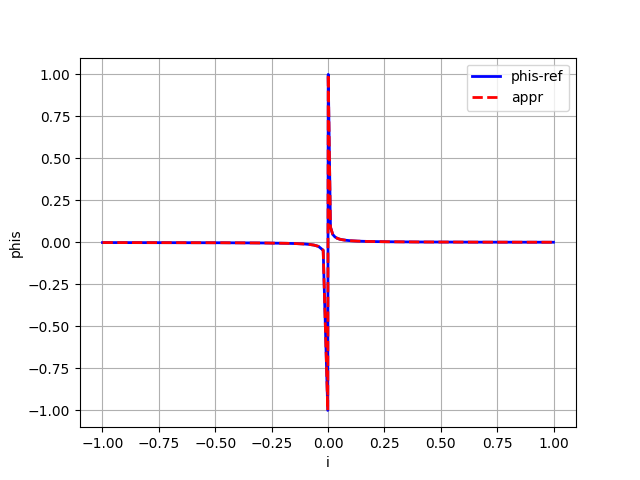

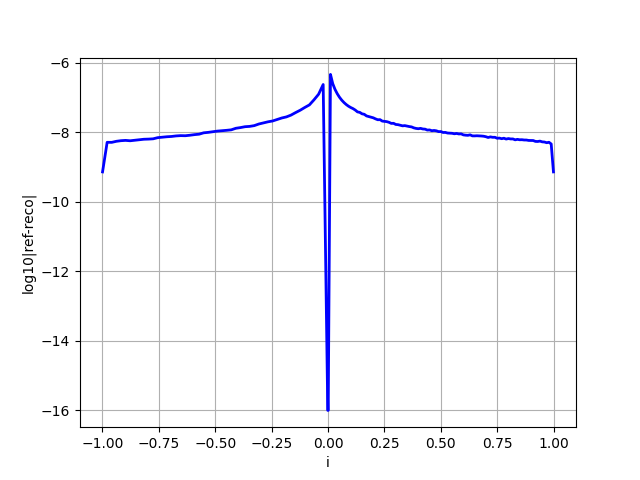

Done.


In [10]:
# ---------------------------------------------------------------------------------
# --- RECHECK: Compute the inverse function using the sequence of 2x2 rotations ---
# ---------------------------------------------------------------------------------
mix.reload_module(eqsvt)

eqsvt.construct_inverse_function(
    phis_appr_,
    kappa     = kappa_goal_, 
    coef_norm = coef_norm_
)
print("Done.")

In [ ]:
# Nc = 20, id_case = 3
# --- for normalized signals ---
# kappa = 100:    1.269e-09
# kappa = 200:    1.614e-05
# kappa = 1000:   2.890e-05
# kappa = 4000:   3.071e-05
# kappa = 10000:  2.999e-05
# kappa = 100000: 1.214e-05

# --- for non-normalized signals ---
# kappa = 60000, err: 2.742e-04
# kappa = 10000, err: 5.323e-05
# kappa = 2000, err: 1.747e-05
# kappa = 1000, err: 1.254e-05  8.762e-04  9.801e-04

In [ ]:
# kappa = 4000, err: 1.701e-05
# kappa = 2000, err: 1.668e-05
# kappa = 400., err: 1.254e-05
# kappa = 200., err: 7.435e-06
# kappa = 100., err: 2.802e-06
# kappa = 50.0, err: 2.337e-05   